# **FUNDAMENTALS OF AI AND MACHINE LEARNING**
 
## The aim is to carry out a predictive model based on regression to calculate the price of a house based on the different variables of the dataset, choosing the model that best adapts according to the metrics analyzed.
 
```python
* Phase 1: Import a dataset from [Kaggle](https://www.kaggle.com/shree1992/housedata).
* Phase 2: Exploratory analysis of the data
* Phase 3: Training
phase * Phase 4: Evaluation and analysis of the results
* Additional phase (optional): Investigate the different cloud views during class 3 and import the project in one of the cloud.
```
 
<img src="https://accounts.iebschool.com/uploads/profile/48f8fd4ccb38eb54c8c8b45656a8d32ce661054e.png" style="float:rigth" width="150">
 
*Guillermo Calvo Altesor*

December 2021

---

# PHASE 1. DataSet

In [1]:
# configure the import from Kaggle
!pip install -q Kaggle

In [2]:
#upload kaggle.json with the client
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
#download dataset
!kaggle datasets download -d shree1992/housedata

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
#movemos fichero json a ubicación correcta
!mv kaggle.json /root/.kaggle/kaggle.json

In [5]:
#move json file to correct location
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 24.3MB/s]


In [6]:
#Decompress the dataset
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


# PHASE 2. Exploratory data analysis

## Numerical | Statistical

In [7]:
#we import pandas to start the Analysis
import pandas as pd
import numpy as np
#we create variable with dataset
df_house = pd.read_csv("./data.csv")

df_house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


---
ℹ -🔉 We take a moment to observe what each column means, what information they are giving us, and we define the ones that could cause doubts:
- `sqft_living`: feet squares of the built area.
- `sqft_lot`: square feet of the entire lot.
- `waterfront`: as it is a boolean variant of 0 and 1, it is about whether or not the house is near the sea.
- `view`: as it consists of variables from 0 to 4, it is a score on the quality of the views. 0 = neutral, 4 = excellent.
- `condition`: the condition of the home (from 1 to 5)
- `sqft_avobe`: square footage of the penthouse or terrace.
- `sqft_basement`: square feet of the basement.
 
---


In [8]:
#check number of rows and columns
df_house.shape

(4600, 18)

In [9]:
#check if we have cells without values
df_house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
​​#type of each column
df_house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [11]:
#check general statistical data
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


---
ℹ -🔉
- We have 4600 rows and 18 columns.
- We don't have null values.
- We have 5 object type columns (string/categorical), 4 floats (decimal numeric), 9 int (integer numeric)
 
ℹ -🔉
- Average price: 551,962 AUD
- Minimum price: 0 AUD (free house or error?)
- Maximum Price: AUD 26,590,000
- Average Year: 1970
- Bedrooms: 0 to 9
- Bathrooms: 0 to 8
- Average Sizes:
  - House: ft²
  - Land: 14,852 ft²
  - Penthouse: 1,827 ft²
  - Basement: 312 ft²
 
These averages must be "taken with tweezers", take them into account as an orientation since we do not have NaN values ​​but 0, which is considered in the statistics.
 
---


## Chart | Visual

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

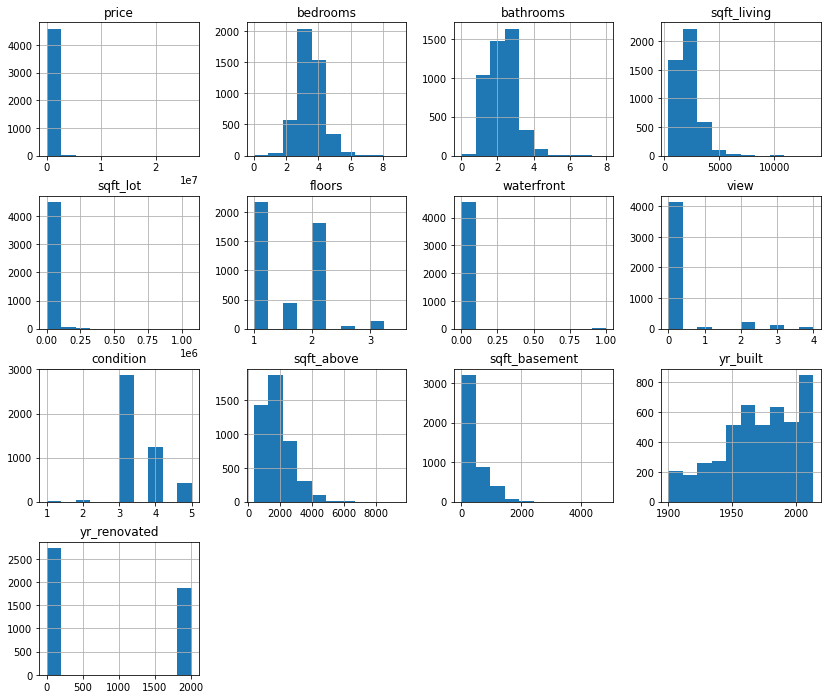

In [13]:
df_house.hist(figsize=(14 , 12)) #Function that returns us a visualization of our numerical data in the form of a Histogram
plt.show()

---
ℹ -🔉 This graph is ideal to corroborate the suspicions of the bias created by the 0s. This shows us that null values ​​do not have to be negative, on the contrary, sometimes they make our job easier with a simple `dropna()`. Let's discuss what these histograms show us:
 
- 🟢`bedrooms`-`bathrooms`-`floors`-`view`-`condition`-`yr_built`: show clear and concise information that helps us better understand our DataSet.
- 🚩`price`-`sqft_lot`-`sqft_living`-`waterfront`: the plot is not optimal for column display.
- ❓`yr_renoveted`: there is a high number of 0 or unrenovated houses and it shows us that our average statistic is wrong.
- ❓`sqft_above`-`sqft_basement`: casts doubt on whether contemplating 0 will be positive or negative for our algorithm, the same as with `yr_renoveted`.
 
We are ready to search for better Plots and to solve our doubts about the 0.
 
---


### 1. More/better plots.
```python
df_house["yr_renovated", "sqft_living", "sqft_above", "sqft_basement"]
df_house["waterfront", "price"]
```

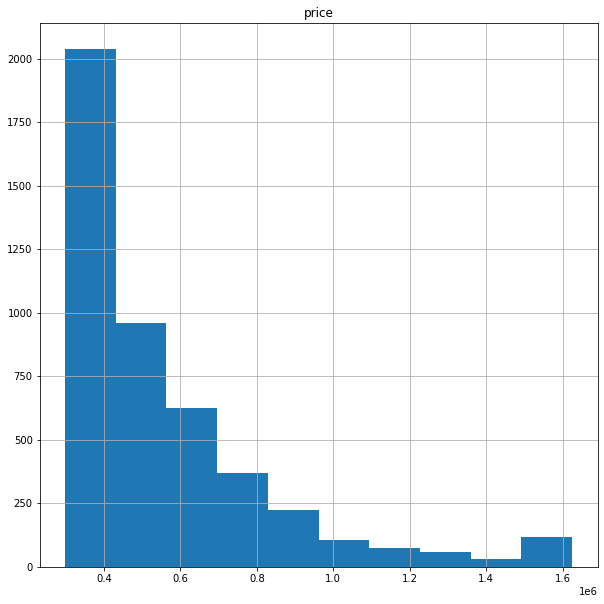

In [14]:
# remove outlier
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

#eliminate the outliers of the price variable
prueba=df_house[["price"]]
prueba=prueba.apply(lambda x: outlier_tret(x))

# Histogram display of the price variable
prueba.hist(figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Distribution of sqft_living')

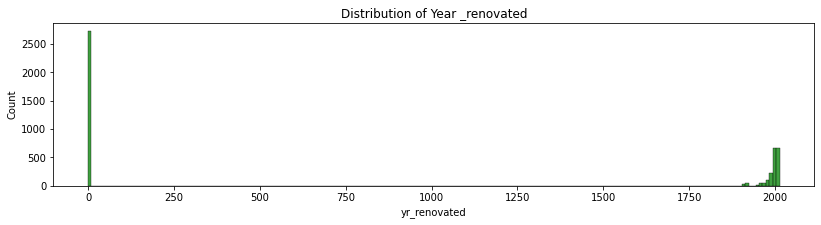

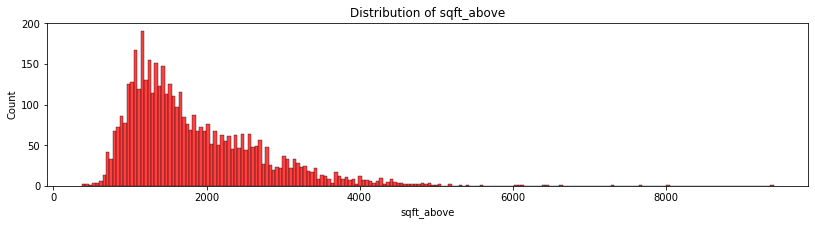

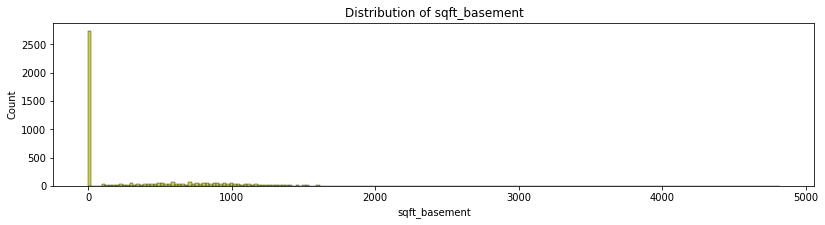

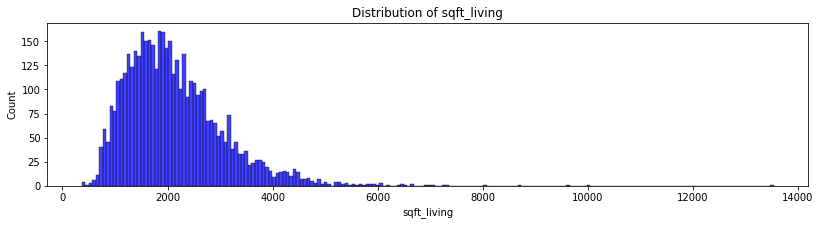

In [15]:
f1 = plt.figure(figsize=(30, 3))

ax = f1.add_subplot(121)
sns.histplot(df_house['yr_renovated'], bins=200, color='g', ax=ax)
ax.set_title('Distribution of Year _renovated')

f2 = plt.figure(figsize=(30, 3))

ax = f2.add_subplot(121)
sns.histplot(df_house['sqft_above'], bins=200, color='r', ax=ax)
ax.set_title('Distribution of sqft_above')

f3 = plt.figure(figsize=(30, 3))

ax = f3.add_subplot(121)
sns.histplot(df_house['sqft_basement'], bins=200, color='y', ax=ax)
ax.set_title('Distribution of sqft_basement')

f4 = plt.figure(figsize=(30, 3))

ax = f4.add_subplot(121)
sns.histplot(df_house['sqft_living'], bins=200, color='b', ax=ax)
ax.set_title('Distribution of sqft_living')

---
ℹ -🔉 With these histplots we have managed to better observe 4 of our 6 variables with doubts: `sqft_above`-`sqft_basement`-`sqft_living` -`yr_renovated`
 
- We have better known our data and better understood the columns of `sqft_living` and `sqft_avobe` by interpreting the distribution of their values ​​graphically and correctly.
- We can also see the high number of 0 values ​​in the `yr_renovated` and `sqft_basement` columns.
---


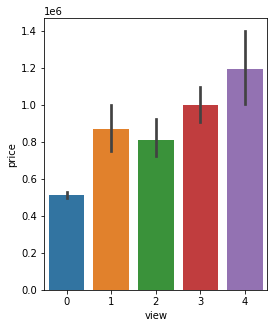

In [16]:
plt.figure(figsize=(4 , 5))
sns.barplot(x=df_house['view'], y=df_house['price'])

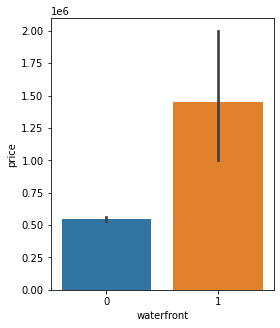

In [17]:
plt.figure(figsize=(4 , 5))
sns.barplot(x=df_house['waterfront'], y=df_house['price'])

In [18]:
import plotly.express as px

In [19]:
px.bar(df_house, x='yr_built', y='price')

---
ℹ -🔉 With the Seaborn and Plotly Barplots we have managed to better visualize our columns and obtain relevant information:
- Houses near the coast have more value
- Houses with a score of two in View are worth around double than those with a score of one, but it does not increase the price by having 3 points, although it does have 4 or 5 points.
- There is a correlation between the year of construction of the house and its price, the newer the more expensive. Still, there are periods of construction where the value of houses decreases. I venture to think that it is due to economic crises, for example, around the years 1930 and 2010.
---


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



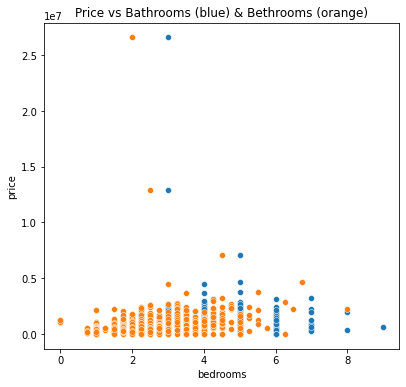

In [20]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(122)
sns.scatterplot(x='bedrooms', y = 'price', data= df_house, palette = 'viridis', ax = ax)
plt.savefig('sc.png')

ax = f.add_subplot(122)
sns.scatterplot(x='bathrooms', y = 'price', data= df_house, palette = 'viridis', ax = ax)
ax.set_title('Price vs Bathrooms (blue) & Bethrooms (orange)')
plt.savefig('sc.png')

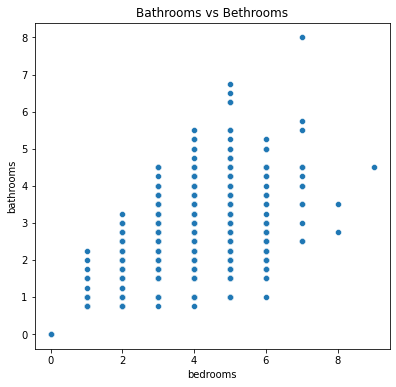

In [21]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(122)
sns.scatterplot(x='bedrooms', y = 'bathrooms', data= df_house, palette = 'viridis', ax = ax)
ax.set_title('Bathrooms vs Bethrooms')
plt.savefig('sc.png')

Text(0.5, 1.0, 'Scatter plot - Price vs Waterfront')

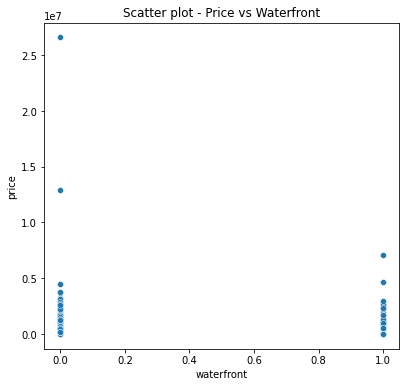

In [22]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='waterfront', y = 'price', data=df_house, palette = 'inferno', ax = ax)
ax.set_title('Scatter plot - Price vs Waterfront')

---
ℹ -🔉 With the Scatterplots we have been able to visualize the atypical values ​​that exist in the price of houses, as well as a correlation in the increase in the price and the number of bedrooms and bathrooms, yes, from 5 the value does not increase considerably. Also a correlation between the increase in the number of rooms with the number of bathrooms.
 
---


### 2. Investigate the 0
```python
df_house["view", "yr_renovated", "sqft_basement", "price", "waterfront"]
```



In [23]:
view_0 = df_house['view'] == 0
df_house.loc[view_0].count()

date             4140
price            4140
bedrooms         4140
bathrooms        4140
sqft_living      4140
sqft_lot         4140
floors           4140
waterfront       4140
view             4140
condition        4140
sqft_above       4140
sqft_basement    4140
yr_built         4140
yr_renovated     4140
street           4140
city             4140
statezip         4140
country          4140
dtype: int64

In [24]:
yr_renovated_0 = df_house['yr_renovated'] == 0
df_house.loc[yr_renovated_0].count()

date             2735
price            2735
bedrooms         2735
bathrooms        2735
sqft_living      2735
sqft_lot         2735
floors           2735
waterfront       2735
view             2735
condition        2735
sqft_above       2735
sqft_basement    2735
yr_built         2735
yr_renovated     2735
street           2735
city             2735
statezip         2735
country          2735
dtype: int64

In [25]:
sqft_basement_0 = df_house['sqft_basement'] == 0
df_house.loc[sqft_basement_0].count()

date             2745
price            2745
bedrooms         2745
bathrooms        2745
sqft_living      2745
sqft_lot         2745
floors           2745
waterfront       2745
view             2745
condition        2745
sqft_above       2745
sqft_basement    2745
yr_built         2745
yr_renovated     2745
street           2745
city             2745
statezip         2745
country          2745
dtype: int64

In [26]:
price_0 = df_house['price'] == 0
df_house.loc[price_0].count()

date             49
price            49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       49
view             49
condition        49
sqft_above       49
sqft_basement    49
yr_built         49
yr_renovated     49
street           49
city             49
statezip         49
country          49
dtype: int64

---
ℹ -🔉
The number is considerable of 0 in the `view` variable. So many that make us consider its usefulness. On the other hand, more than half of the houses have not been renovated `yr_renovated`, the same with the number of houses that do not have a basement `sqft_basement`
 
But the most interesting fact here is that there are 49 houses without a price, which we interpret as of great importance because it is the target variable, and what our algorithm should predict.
 
---


## Preprocessing
 
We proceed to prepare our DataSet for training. Before launching the hypotheses, we are going to model the data that we consider to be necessary in a logical way and it is not necessary to contemplate the change in hypotheses.


### ['country']
 
ℹ -🔉 At first glance it seems that there is only one value, USA. We'll look at this with `nunique()` and, for practice, with a `heatmap` converting the variable from Categorical to Numeric.
```python
df_house["country"]
del(df_house['country']) #SPOILER
```


In [27]:
df_house.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [28]:
categorical_country = ['country']
df_house_usa_num = pd.get_dummies(data = df_house, prefix = 'OHE', prefix_sep= '-',
                                 columns = categorical_country,
                                 drop_first = False,
                                 dtype = 'int8')
df_house_usa_num

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,OHE-USA
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,1
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,1
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,1
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,1
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,1
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,1
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,1
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,1


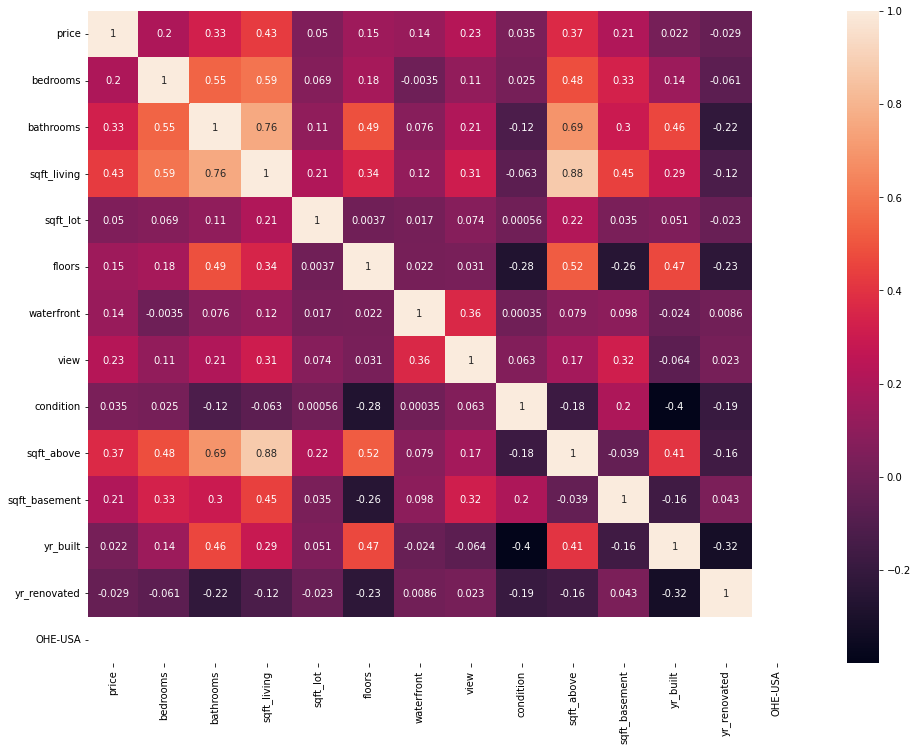

In [29]:
corr = df_house_usa_num.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True)

---
ℹ -🔉
We delete the `country` column as it is useless in our case as there is a maximum correlation and count with a single value that does not return any information to the algorithm, it only occupies space in this case.
 
---


In [30]:
del(df_house['country']) 
#with this formula we can only delete one column,
#for more use df.drop(['MD Dev', 'MD Skew'], axis = 'columns', inplace=True)
df_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip'],
      dtype='object')

### ['date']
We believe that the date the house was registered in the DataSet does not influence its price, therefore it would interfere with our prediction.


Text(0.5, 1.0, 'Distribution of date')

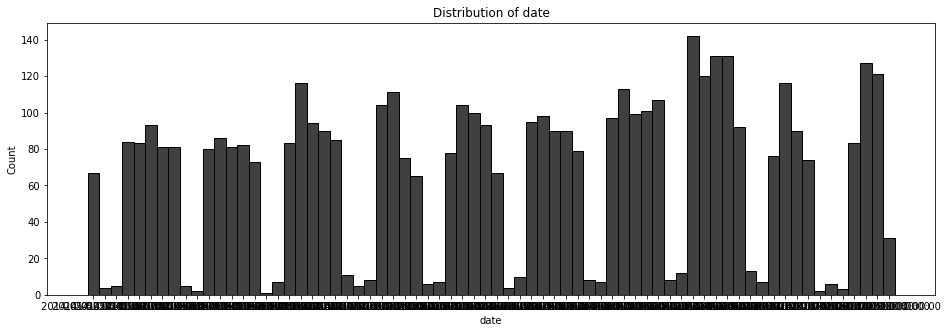

In [31]:
f = plt.figure(figsize=(35, 5))

ax = f.add_subplot(121)
sns.histplot(df_house['date'], bins=200, color='k', ax=ax)
ax.set_title('Distribution of date')

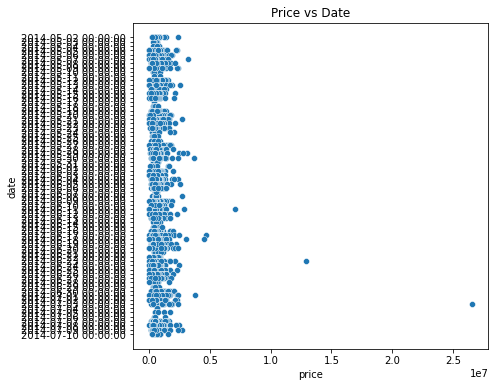

In [32]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(122)
sns.scatterplot(x='price', y = 'date', data= df_house, palette = 'viridis', ax = ax)
ax.set_title('Price vs Date')
plt.savefig('sc.png')

---
ℹ -🔉
We will not remove the `date` column. The graphs show us certain anomalous values ​​and some differences in the number of records per day. Maybe it will help the algorithm.
 
---

### ['price']
ℹ -🔉 We consider the rows that have a value of 0 in this column to be of great value, since they are the houses in which we should apply our algorithm and predict their price. So we are going to create and save a separate DataSet with it.
```python
df_price_0.to_csv("df_price_0.csv")
```


In [33]:
df_price_0 = df_house['price'] == 0
df_price_0 = df_house.loc[df_price_0]
df_price_0

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004


In [34]:
df_price_0.to_csv("df_price_0.csv")

---
ℹ -🔉 After observing the 0 values ​​in `price` and knowing that this will be our target variable, we have saved this DataFrame as a separate DataSet . It is interpreted as the ideal opportunity to check our algorithm and predict the price of these homes.
 
---


# PHASE 3. Regression Algorithm Training

##❔ Hypothesis 1. Only v. numerical

In [35]:
df_house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
dtype: object

In [ ]:
# we prepare the Dataset for hypothesis 1
# we delete the categorical columns

categorical_columns = ['date','street','city','statezip']
df_house_hipot1 = df_house.drop(categorical_columns, axis = 1)
df_house_hipot1.head()

: 

### Training

In [37]:
X_hipot1 = df_house_hipot1.drop('price',axis=1) #independent variables
y_hipot1 = df_house_hipot1['price'] #dependent variable

In [38]:
# we prepare train data and test data
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [39]:
# We train the Linear Regression model

from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression() #This is not necessary, just a Spanish translation
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

### Validation

---
ℹ -🔉 We perform a first validation with the Mean Square Error (MSE) and a second validation with the Mean Absolute Error (MAE).
 
---


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# predict the values ​​from the data used in TRAINING
prediction_train = regresion_lineal.predict(X_hipot1_train)

# Calculate MSE from the prediction in TRAINING
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediction_train)
print('MSE TRAIN = ' + str(mse_hipot1_train))

# Predict the values ​​from the data used in TESTING
prediction_test = regresion_lineal.predict(X_hipot1_test)

# Calculate MSE from the prediction in TESTING
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediction_test)
print('MSE TEST = ' + str(mse_hipot1_test))

MSE TRAIN = 292440342188.2669
MSE TEST = 74834240426.81778


In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
# Predict the values ​​from the data used in the TRAINING
prediction_train = regresion_lineal.predict(X_hipot1_train)

# We calculate MAE of the TRAINING prediction
mae_hipot1_train = mean_absolute_error(y_true = y_hipot1_train, y_pred = prediction_train)
print('MAE TRAIN = ' + str(mae_hipot1_train))

# we predict the values ​​with the data used in the TEST
prediction_test = regresion_lineal.predict(X_hipot1_test)

# We calculate MAE of the TEST prediction
mae_hipot1_test = mean_absolute_error(y_true = y_hipot1_test, y_pred = prediction_test)
print('MAE TEST = ' + str(mae_hipot1_test))

MAE TRAIN = 171919.02499150237
MAE TEST = 159165.8841701174


---
ℹ -🔉 **MAE**: by not squaring, we do not penalize the large errors, which makes it not very sensitive to outliers. It is not highly recommended for models that need to pay attention to anomalous values. Therefore, it indicates a smaller error than the MSE.
 
---




##❔ Hypothesis 2. Without 0 in vo/d. ['price']
 
ℹ -🔉 We remove the 49 rows with no values ​​in `price` to see if this improves our algorithm.

In [44]:
df_house_hipot2 = df_house_hipot1[df_house_hipot1['price'] != 0]

df_house_hipot2.min()

price            7800.0
bedrooms            0.0
bathrooms           0.0
sqft_living       370.0
sqft_lot          638.0
floors              1.0
waterfront          0.0
view                0.0
condition           1.0
sqft_above        370.0
sqft_basement       0.0
yr_built         1900.0
yr_renovated        0.0
dtype: float64

### Entrenamiento

In [45]:
X_hipot2 = df_house_hipot2.drop('price',axis=1) 
y_hipot2 = df_house_hipot2['price'] 

In [46]:

X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [47]:

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

### Validación

MSE:

In [48]:
prediction_train = regresion_lineal.predict(X_hipot2_train)


mse_hipot2_train = mean_squared_error(y_true = y_hipot2_train, y_pred = prediction_train)
print('MSE HIPO 1 TRAIN = ' + str(mse_hipot1_train))
print('MSE HIPO 2 TRAIN = ' + str(mse_hipot2_train))


prediction_test = regresion_lineal.predict(X_hipot2_test)


mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediction_test)
print('MSE HIPO 1 TEST = ' + str(mse_hipot1_test))
print('MSE HIPO 2 TEST = ' + str(mse_hipot2_test))

MSE HIPO 1 TRAIN = 292440342188.2669
MSE HIPO 2 TRAIN = 287445495113.3328
MSE HIPO 1 TEST = 74834240426.81778
MSE HIPO 2 TEST = 66558024873.99859


MAE:

In [49]:
prediction_train = regresion_lineal.predict(X_hipot2_train)


mae_hipot2_train = mean_absolute_error(y_true = y_hipot2_train, y_pred = prediction_train)
print('MAE HIPO 1 TRAIN = ' + str(mae_hipot1_train))
print('MAE HIPO 2 TRAIN = ' + str(mae_hipot2_train))


prediction_test = regresion_lineal.predict(X_hipot2_test)


mae_hipot2_test = mean_absolute_error(y_true = y_hipot2_test, y_pred = prediction_test)
print('MAE HIPO 1 TEST = ' + str(mae_hipot1_test))
print('MAE HIPO 2 TEST = ' + str(mae_hipot2_test))

MAE HIPO 1 TRAIN = 171919.02499150237
MAE HIPO 2 TRAIN = 166588.5288487414
MAE HIPO 1 TEST = 159165.8841701174
MAE HIPO 2 TEST = 157693.66087180312


---
ℹ -🔉 Our MAE and MSE have slightly improved by removing rows with value 0 in the target variable, so we continue to practice the algorithm with this change.
 
---


##❔ Hypothesis 3. No 0 in i.v.

In [50]:
df_house_hipot2['yr_renovated'][df_house_hipot2['yr_renovated'] == 0] = None
df_house_hipot2['yr_renovated'] = df_house_hipot2['yr_renovated'].astype(float)

df_house_hipot2['sqft_basement'][df_house_hipot2['sqft_basement'] == 0] = None
df_house_hipot2['sqft_basement'] = df_house_hipot2['sqft_basement'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_

In [51]:
df_house_hipot3 = df_house_hipot2

df_house_hipot3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


---
ℹ - 🔉 Although from the beginning there was a temptation to convert the `0` in the variables `sqft_basement` and `yr_renovated` to `NaN`, we did not would compromise the algorithm. Due to Hypothesis 3 we have done it and we take the opportunity to display the statistical description of our columns again. Where now we no longer have to take the data with tweezers.
 
ℹ - 🔉 Perhaps we could have made this same change instead of removing the 49 rows with 0 in `price` but we don't think this 0.93% of the DataSet is going to compromise our algorithm so we continue like this.
 
---


### Training

In [52]:
X_hipot3 = df_house_hipot3.drop('price',axis=1) 
y_hipot3 = df_house_hipot3['price'] 

In [53]:

X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [54]:

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)

ValueError: ignored

---
ℹ -🔉 We have learned that Linear Regressions cannot be performed with NaN values.continue on Hypothesis 2.
 
---


##❔ Hypothesis 4. Cat -> Num

In [55]:
df_house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
dtype: object

In [56]:
categorical_columns_2 = ['date', 'street', 'city','statezip']
df_house_hipot4 = pd.get_dummies(data = df_house, prefix = 'OHE', prefix_sep= '-',
                                 columns = categorical_columns_2,
                                 drop_first = True,
                                 dtype = 'int8')
df_house_hipot4.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'OHE-WA 98155', 'OHE-WA 98166', 'OHE-WA 98168', 'OHE-WA 98177',
       'OHE-WA 98178', 'OHE-WA 98188', 'OHE-WA 98198', 'OHE-WA 98199',
       'OHE-WA 98288', 'OHE-WA 98354'],
      dtype='object', length=4725)

### Training

In [57]:
X_hipot4 = df_house_hipot4.drop('price',axis=1) 
y_hipot4 = df_house_hipot4['price']

In [58]:

X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [59]:

regresion_lineal = LinearRegression() 
regresion_lineal.fit(X_hipot4_train, y_hipot4_train)

LinearRegression()

### Validation

MSE:

In [60]:
prediction_train = regresion_lineal.predict(X_hipot4_train)

mse_hipot4_train = mean_squared_error(y_true = y_hipot4_train, y_pred = prediction_train)
print('MSE HIPO 1 TRAIN = ' + str(mse_hipot1_train))
print('MSE HIPO 2 TRAIN = ' + str(mse_hipot2_train))
print('MSE HIPO 4 TRAIN = ' + str(mse_hipot4_train))


prediction_test = regresion_lineal.predict(X_hipot4_test)

mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediction_test)
print('MSE HIPO 1 TEST = ' + str(mse_hipot1_test))
print('MSE HIPO 2 TEST = ' + str(mse_hipot2_test))
print('MSE HIPO 4 TEST = ' + str(mse_hipot4_test))

MSE HIPO 1 TRAIN = 292440342188.2669
MSE HIPO 2 TRAIN = 287445495113.3328
MSE HIPO 4 TRAIN = 8.332265545532518e-10
MSE HIPO 1 TEST = 74834240426.81778
MSE HIPO 2 TEST = 66558024873.99859
MSE HIPO 4 TEST = 286047211699.8415


MAE:

In [61]:
prediction_train = regresion_lineal.predict(X_hipot4_train)

mae_hipot4_train = mean_absolute_error(y_true = y_hipot4_train, y_pred = prediction_train)
print('MAE HIPO 1 TRAIN = ' + str(mae_hipot1_train))
print('MAE HIPO 2 TRAIN = ' + str(mae_hipot2_train))
print('MAE HIPO 4 TRAIN = ' + str(mae_hipot4_train))


prediction_test = regresion_lineal.predict(X_hipot4_test)

mae_hipot4_test = mean_absolute_error(y_true = y_hipot4_test, y_pred = prediction_test)
print('MAE HIPO 1 TEST = ' + str(mae_hipot1_test))
print('MAE HIPO 2 TEST = ' + str(mae_hipot2_test))
print('MAE HIPO 4 TEST = ' + str(mae_hipot4_test))

MAE HIPO 1 TRAIN = 171919.02499150237
MAE HIPO 2 TRAIN = 166588.5288487414
MAE HIPO 4 TRAIN = 1.742278768885982e-05
MAE HIPO 1 TEST = 159165.8841701174
MAE HIPO 2 TEST = 157693.66087180312
MAE HIPO 4 TEST = 299636.3496584034


 
---
ℹ -🔉 Our MAE and MSE have improved by passing Categorical to Numerical variables, so we continue to practice the algorithm with this change.
 
---


##❔ Hypothesis 5. StandardScaler normalization We will
this preprocessing using the ScikitLearn library and the different Scalers (scaled) it provides. We start with StandardScaler().


In [62]:
X_hipot5 = df_house_hipot4.drop('price',axis=1)s
y_hipot5 = df_house_hipot4['price'] 

In [63]:
# Scale the charges variable to make it more standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sklearn's Preprocessing algorithms are prepared to convert matrices so we have to do a transformation of our variable y, since it is a variable of type String.
 
To do this we do a **.to_numpy()** that converts the series into an array and then we do a *reshape(-1,1)* that transforms a 1xn array into an nx1 matrix.

In [64]:
y_hipot5 = scaler.fit_transform(y_hipot5.to_numpy().reshape(-1,1))

We return to transform our variable into an array of 1xn.

In [65]:
y_hipot5 = y_hipot5.reshape(1,-1)[0]

### Training

In [66]:

X_hipot5_train, X_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(X_hipot5, y_hipot5, test_size=0.20, random_state=43)

In [67]:

regresion_lineal = LinearRegression() 
regresion_lineal.fit(X_hipot5_train, y_hipot5_train)

LinearRegression()

### Validation

MSE:

In [68]:
prediction_train = regresion_lineal.predict(X_hipot5_train)

mse_hipot5_train = mean_squared_error(y_true = y_hipot5_train, y_pred = prediction_train)
print('MSE HIPO 1 TRAIN = ' + str(mse_hipot1_train))
print('MSE HIPO 2 TRAIN = ' + str(mse_hipot2_train))
print('MSE HIPO 4 TRAIN = ' + str(mse_hipot4_train))
print('MSE HIPO 5 TRAIN = ' + str(mse_hipot5_train))

prediction_test = regresion_lineal.predict(X_hipot5_test)

mse_hipot5_test = mean_squared_error(y_true = y_hipot5_test, y_pred = prediction_test)
print('MSE HIPO 1 TEST = ' + str(mse_hipot1_test))
print('MSE HIPO 2 TEST = ' + str(mse_hipot2_test))
print('MSE HIPO 4 TEST = ' + str(mse_hipot4_test))
print('MSE HIPO 5 TEST = ' + str(mse_hipot5_test))

MSE HIPO 1 TRAIN = 292440342188.2669
MSE HIPO 2 TRAIN = 287445495113.3328
MSE HIPO 4 TRAIN = 8.332265545532518e-10
MSE HIPO 5 TRAIN = 2.703090540294124e-21
MSE HIPO 1 TEST = 74834240426.81778
MSE HIPO 2 TEST = 66558024873.99859
MSE HIPO 4 TEST = 286047211699.8415
MSE HIPO 5 TEST = 0.8999710445355116


MAE:

In [69]:
mae_hipot5_train = mean_absolute_error(y_true = y_hipot4_train, y_pred = prediction_train)
print('MAE HIPO 1 TRAIN = ' + str(mae_hipot1_train))
print('MAE HIPO 2 TRAIN = ' + str(mae_hipot2_train))
print('MAE HIPO 4 TRAIN = ' + str(mae_hipot4_train))
print('MAE HIPO 5 TRAIN = ' + str(mae_hipot5_train))

mae_hipot5_test = mean_absolute_error(y_true = y_hipot4_test, y_pred = prediction_test)
print('MAE HIPO 1 TEST = ' + str(mae_hipot1_test))
print('MAE HIPO 2 TEST = ' + str(mae_hipot2_test))
print('MAE HIPO 4 TEST = ' + str(mae_hipot4_test))
print('MAE HIPO 5 TEST = ' + str(mae_hipot5_test))

MAE HIPO 1 TRAIN = 171919.02499150237
MAE HIPO 2 TRAIN = 166588.5288487414
MAE HIPO 4 TRAIN = 1.742278768885982e-05
MAE HIPO 5 TRAIN = 555152.3852201334
MAE HIPO 1 TEST = 159165.8841701174
MAE HIPO 2 TEST = 157693.66087180312
MAE HIPO 4 TEST = 299636.3496584034
MAE HIPO 5 TEST = 539205.4128185273


---
ℹ -🔉 Our MSE has gotten considerably closer to 0, but our MAE has gotten a lot further away. We deduce that it is due to the anomalous values ​​to which the MAE is not as sensitive and for which it does not perform such a correct interpretation. We rely more on the MSE for our prediction.
 
---


##❔ Hypothesis 6. Normalization
 
In this preprocess we perform a MaxAbsScaler() with more than one variable and for this we will choose the ones that show the best correlation with price.
```python
["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']
```


In [70]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_house_hipot4[["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']] = scaler.fit_transform(df_house_hipot4[["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']] )


In [71]:
X_hipot6 = df_house_hipot4.drop('price',axis=1) 
y_hipot6 = df_house_hipot4['price'] 

### Training

In [72]:
X_hipot6_train, X_hipot6_test, y_hipot6_train, y_hipot6_test = train_test_split(X_hipot6, y_hipot6, test_size=0.20, random_state=43)

In [73]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot6_train, y_hipot6_train)

LinearRegression()

### Validation

MSE:

In [74]:
prediction_train = regresion_lineal.predict(X_hipot6_train)

mse_hipot6_train = mean_squared_error(y_true = y_hipot6_train, y_pred = prediction_train)
print('MSE HIPO 1 TRAIN = ' + str(mse_hipot1_train))
print('MSE HIPO 2 TRAIN = ' + str(mse_hipot2_train))
print('MSE HIPO 4 TRAIN = ' + str(mse_hipot4_train))
print('MSE HIPO 5 TRAIN = ' + str(mse_hipot5_train))
print('MSE HIPO 6 TRAIN = ' + str(mse_hipot6_train))

prediction_test = regresion_lineal.predict(X_hipot6_test)

mse_hipot6_test = mean_squared_error(y_true = y_hipot6_test, y_pred = prediction_test)
print('MSE HIPO 1 TEST = ' + str(mse_hipot1_test))
print('MSE HIPO 2 TEST = ' + str(mse_hipot2_test))
print('MSE HIPO 4 TEST = ' + str(mse_hipot4_test))
print('MSE HIPO 5 TEST = ' + str(mse_hipot5_test))
print('MSE HIPO 6 TEST = ' + str(mse_hipot6_test))

MSE HIPO 1 TRAIN = 292440342188.2669
MSE HIPO 2 TRAIN = 287445495113.3328
MSE HIPO 4 TRAIN = 8.332265545532518e-10
MSE HIPO 5 TRAIN = 2.703090540294124e-21
MSE HIPO 6 TRAIN = 1.191091645457662e-26
MSE HIPO 1 TEST = 74834240426.81778
MSE HIPO 2 TEST = 66558024873.99859
MSE HIPO 4 TEST = 286047211699.8415
MSE HIPO 5 TEST = 0.8999710445355116
MSE HIPO 6 TEST = 0.00040484333474700995


MAE:

In [75]:
mae_hipot6_train = mean_absolute_error(y_true = y_hipot6_train, y_pred = prediction_train)
print('MAE HIPO 1 TRAIN = ' + str(mae_hipot1_train))
print('MAE HIPO 2 TRAIN = ' + str(mae_hipot2_train))
print('MAE HIPO 4 TRAIN = ' + str(mae_hipot4_train))
print('MAE HIPO 5 TRAIN = ' + str(mae_hipot5_train))
print('MAE HIPO 6 TRAIN = ' + str(mae_hipot6_train))

mae_hipot6_test = mean_absolute_error(y_true = y_hipot6_test, y_pred = prediction_test)
print('MAE HIPO 1 TEST = ' + str(mae_hipot1_test))
print('MAE HIPO 2 TEST = ' + str(mae_hipot2_test))
print('MAE HIPO 4 TEST = ' + str(mae_hipot4_test))
print('MAE HIPO 5 TEST = ' + str(mae_hipot5_test))
print('MAE HIPO 6 TEST = ' + str(mae_hipot6_test))

MAE HIPO 1 TRAIN = 171919.02499150237
MAE HIPO 2 TRAIN = 166588.5288487414
MAE HIPO 4 TRAIN = 1.742278768885982e-05
MAE HIPO 5 TRAIN = 555152.3852201334
MAE HIPO 6 TRAIN = 8.599453150450593e-14
MAE HIPO 1 TEST = 159165.8841701174
MAE HIPO 2 TEST = 157693.66087180312
MAE HIPO 4 TEST = 299636.3496584034
MAE HIPO 5 TEST = 539205.4128185273
MAE HIPO 6 TEST = 0.011250862893714355


 
---
ℹ -🔉 Both the MSE and MAE have moved considerably closer to 0 , we should be able to predict the price of the 49 houses. Let's try some more scaling to see if it further improves our Prediction Model.
 
---


##❔ Hypothesis 7. RobustScaler normalization
 
In this preprocess we perform a RobustScaler() with more than one variable and for this we will choose the ones that show the best correlation with price.
```python
["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']
```


In [76]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_house_hipot4[["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']] = scaler.fit_transform(df_house_hipot4[["price","condition", 'sqft_lot', 'sqft_living', 'waterfront', 'floors']] )


In [77]:
X_hipot7 = df_house_hipot4.drop('price',axis=1) 
y_hipot7 = df_house_hipot4['price'] 

### Training

In [78]:
X_hipot7_train, X_hipot7_test, y_hipot7_train, y_hipot7_test = train_test_split(X_hipot7, y_hipot7, test_size=0.20, random_state=43)

In [79]:
regresion_lineal = LinearRegression() 
regresion_lineal.fit(X_hipot7_train, y_hipot7_train)

LinearRegression()

### Validation

MSE:

In [80]:
prediction_train = regresion_lineal.predict(X_hipot7_train)

mse_hipot7_train = mean_squared_error(y_true = y_hipot6_train, y_pred = prediction_train)
print('MSE HIPO 1 TRAIN = ' + str(mse_hipot1_train))
print('MSE HIPO 2 TRAIN = ' + str(mse_hipot2_train))
print('MSE HIPO 4 TRAIN = ' + str(mse_hipot4_train))
print('MSE HIPO 5 TRAIN = ' + str(mse_hipot5_train))
print('MSE HIPO 6 TRAIN = ' + str(mse_hipot6_train))
print('MSE HIPO 7 TRAIN = ' + str(mse_hipot7_train))

# predecimos los valores con los datos usados en el TESTEO
prediction_test = regresion_lineal.predict(X_hipot7_test)

mse_hipot7_test = mean_squared_error(y_true = y_hipot6_test, y_pred = prediction_test)
print('MSE HIPO 1 TEST = ' + str(mse_hipot1_test))
print('MSE HIPO 2 TEST = ' + str(mse_hipot2_test))
print('MSE HIPO 4 TEST = ' + str(mse_hipot4_test))
print('MSE HIPO 5 TEST = ' + str(mse_hipot5_test))
print('MSE HIPO 6 TEST = ' + str(mse_hipot6_test))
print('MSE HIPO 7 TEST = ' + str(mse_hipot7_test))

MSE HIPO 1 TRAIN = 292440342188.2669
MSE HIPO 2 TRAIN = 287445495113.3328
MSE HIPO 4 TRAIN = 8.332265545532518e-10
MSE HIPO 5 TRAIN = 2.703090540294124e-21
MSE HIPO 6 TRAIN = 1.191091645457662e-26
MSE HIPO 7 TRAIN = 3.234819630502718
MSE HIPO 1 TEST = 74834240426.81778
MSE HIPO 2 TEST = 66558024873.99859
MSE HIPO 4 TEST = 286047211699.8415
MSE HIPO 5 TEST = 0.8999710445355116
MSE HIPO 6 TEST = 0.00040484333474700995
MSE HIPO 7 TEST = 3.1142874856809173


MAE:

In [81]:
mae_hipot7_train = mean_absolute_error(y_true = y_hipot7_train, y_pred = prediction_train)
print('MAE HIPO 1 TRAIN = ' + str(mae_hipot1_train))
print('MAE HIPO 2 TRAIN = ' + str(mae_hipot2_train))
print('MAE HIPO 4 TRAIN = ' + str(mae_hipot4_train))
print('MAE HIPO 5 TRAIN = ' + str(mae_hipot5_train))
print('MAE HIPO 6 TRAIN = ' + str(mae_hipot6_train))
print('MAE HIPO 7 TRAIN = ' + str(mae_hipot7_train))

mae_hipot7_test = mean_absolute_error(y_true = y_hipot7_test, y_pred = prediction_test)
print('MAE HIPO 1 TEST = ' + str(mae_hipot1_test))
print('MAE HIPO 2 TEST = ' + str(mae_hipot2_test))
print('MAE HIPO 4 TEST = ' + str(mae_hipot4_test))
print('MAE HIPO 5 TEST = ' + str(mae_hipot5_test))
print('MAE HIPO 6 TEST = ' + str(mae_hipot6_test))
print('MAE HIPO 7 TEST = ' + str(mae_hipot7_test))

MAE HIPO 1 TRAIN = 171919.02499150237
MAE HIPO 2 TRAIN = 166588.5288487414
MAE HIPO 4 TRAIN = 1.742278768885982e-05
MAE HIPO 5 TRAIN = 555152.3852201334
MAE HIPO 6 TRAIN = 8.599453150450593e-14
MAE HIPO 7 TRAIN = 4.74046690614837e-12
MAE HIPO 1 TEST = 159165.8841701174
MAE HIPO 2 TEST = 157693.66087180312
MAE HIPO 4 TEST = 299636.3496584034
MAE HIPO 5 TEST = 539205.4128185273
MAE HIPO 6 TEST = 0.011250862893714355
MAE HIPO 7 TEST = 0.9020714127812957


---
ℹ -🔉 Tanto el MSE como el MAE se han alejado de 0. Damos por terminado nuestro entrenamiento y nos quedamos con MaxAbsScaler como el mejor escalado para nuestro Modelo de Predicción.

---

# PHASE 4. Evaluation and analysis of the results
 
## About the project
- The **results** are **positive**. We have carried out the following phases of the Project:
```python
  1. The Kaggle DataSet has been imported optimally.
  2. An EDA (Exploratory Data Analysis) has been carried out trying to delve into the data and understand it, making visualizations that were optimal for observing the columns.
  3. In addition, a preprocessing has been carried out by eliminating columns and extracting rows with the aim of a real prediction of the price of the 49 missing homes.
  4. The algorithm has been trained and validated under 6 hypotheses, serving for the final model 4 main changes in the DataFrame that have reached satisfactory MSE and MAE values.
````
- The **Final Predictive Model** has had the following preprocessing:
```python
  1. Delete ['country']
  2. Export and delete 49 rows ['price'] == 0
  3. Converting v.Cat ['date', 'city', 'street', 'statezip'] to Numeric
  4. scikit-klearn MaxAbsScaler() normalization
  ```
- Mean Error (MSE)** and **Mean Absolute Error (MAE)** were as follows:
```python
  - MSE TRAIN: **1.191** - MSE TEST: **0.0004**
  - MAE TRAIN: **8.5994** - MAE TEST: **0.01**
```

